# pandas : 1차원 Series, 2차원 DataFrame, 3차원 Panel

# numpy 방식의 인덱싱이 가능,+ dict (중복을 허용, 순서를 보장)

In [3]:
import pandas as pd
data= {'a': 0., 'b':1., 'c':2.}
s =pd.Series(data) # 1차원 => key : 인덱스
print(s['a'])      # key  인덱싱
print()

s=pd.Series(data, index=['b','c','d','a']) # 행이름
print(s['a'])
print(s['d']) # => nan 데이터 없음
list(s)

0.0

0.0
nan


[1.0, 2.0, nan, 0.0]

In [4]:
s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
print("인덱스에 의한 출력", s[0]) # 순서에 의한 인덱스도 가능하고
print()                           # key에 의한 인덱스도 가능
print(s['a'])   # key 인덱스
print()


print(' [:] 출력')
print(s[:3])

print()
print("음수", s[-3:])

인덱스에 의한 출력 1

1

 [:] 출력
a    1
b    2
c    3
dtype: int64

음수 c    3
d    4
e    5
dtype: int64


In [5]:
s['a']=100 ; print(s['a'])

s['f']=10 ; print(s['f']) ;print()

print("치환값 들어감")
s

100
10

치환값 들어감


a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64

In [7]:
print('filtering에 의한 출력', s[s>4]) # 인덱스 : boolean index
print(" 데이터값이 4보다 큰 인덱스 호출")

print() # 4보다 큰 수인 e :5 , f :10 만 출력됨

s*2

filtering에 의한 출력 a    100
e      5
f     10
dtype: int64
 데이터값이 4보다 큰 인덱스 호출



a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64

In [12]:
import numpy as np

data=np.array(['a','b','c','d']) # ndarray
# RangeIndex 가 자동으로 생성됨 (star=0, stop=4, step=1) 인덱스 따로 지정안해서
# 인덱스 defualt 값이 숫자 ~
# range => list   arange => ndarray

s=pd.Series(data) # ndarray를 이용해 시리즈 초기화

print("시리즈 데이터", s.values) # 값만
print("시리즈 인덱스", s.index)  #rangeIndex
print("시리즈 ", s)
print()
print("시리즈 인덱스의 값", s.index.values)
print()

print(s[0])
print(s.head) # tail ()


시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈  0    a
1    b
2    c
3    d
dtype: object

시리즈 인덱스의 값 [0 1 2 3]

a
<bound method NDFrame.head of 0    a
1    b
2    c
3    d
dtype: object>


In [10]:
print(s.value_counts()) # 도수분포표
print()
# 데이터 빈도, 위에서 ndarray 만들때 데이터만 넣고 별도 key 없어서
# ['a','b','c','d'] 데이터 빈도는 각 1번씩, 


print(s.value_counts( normalize=True)) 
# 전체를 사이즈 1로  => 상대도수분포표
# 정규화? 일반화시키는중?


print()
print(s.describe()) 


d    1
c    1
b    1
a    1
dtype: int64

d    0.25
c    0.25
b    0.25
a    0.25
dtype: float64

count     4
unique    4
top       d
freq      1
dtype: object


# dtype: object   =>> 문자열인 경우 오브젝트로 나옴

기본적으로 dtype, shape/ndim 정도는 미리체크

In [40]:
print(" 데이터 타입은", s.dtype)

print(" 차원", s.ndim)
print("차수", s.shape)

 데이터 타입은 object
 차원 1
차수 (4,)


# dict => 형태로 Series 1차원 데이터 만들면

인덱스를 숫자로 자동배열 안하고 원하는 것으로 정의할수 있음
key= index

In [11]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata) #1차원 판다스 데이터 자료형 (1행4열)
# 데이터 넣을때 dict 형태로 만들어줘서 인덱스 0,1,2,3, 이 아니라 key 값 들어감 = 단순 1차원데이터라

print(obj3)
print(obj3.shape)
print(obj3.index)

# 위의 데이터 초기화 시킨후
# 인덱스를 추가함
# 인덱스만 추가하고 데이터값이 없는 경우 = 결측치처리

states=['Califonia', 'Ohio', 'Oregon', 'Texas']
obj4=pd.Series(sdata, index=states)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)
Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')


Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64

In [13]:
print("시리즈 인덱스", obj3.index)
print("시리즈 인덱스", obj4.index)
print()

# 위에 인덱스로 새로 추가된 캘리포니아 = 결측치 => 데이터전처리할때 처리.

print("null이 있는가", pd.isnull(obj4));print()
print("null(결측치가 아닌경우)이 아닌가", pd.notnull(obj4));print();print()
print("객체출력")
print()
print("obj3출력", obj3) # 새로 인덱스하기전 데이터
print("obj4출력", obj4) # 캘리포니아 추가 우타와 빠짐
print()
# 짝이 맞지 않기 때문에 = > 
# index 가 다름 => null 짝이 없는 것만 =캘리포니아, 우타와
# 우타와는 ob3 에 데이터값 있었는데 obj4 에 값이 없어서 nan 처리

print("연산결과를 출력합니다", obj3 + obj4)

시리즈 인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스 Index(['Califonia', 'Ohio', 'Oregon', 'Texas'], dtype='object')

null이 있는가 Califonia     True
Ohio         False
Oregon       False
Texas        False
dtype: bool

null(결측치가 아닌경우)이 아닌가 Califonia    False
Ohio          True
Oregon        True
Texas         True
dtype: bool


객체출력

obj3출력 Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4출력 Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64

연산결과를 출력합니다 Califonia         NaN
Ohio          70000.0
Oregon        32000.0
Texas        142000.0
Utah              NaN
dtype: float64


# 데이터 끼리 연산시 values + Nan = Nan 결측치 missing value 되어버림

# 나중에 전처리에 해당되는 value


# 문자열 처리함수 => str.count('a') a 알파벳 몇개 가지고 있는지

In [54]:
s=pd.Series(['A','B','Aaba','Baca', np.nan, 'CABA','cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

# plot.kde() : kernel density estimate 

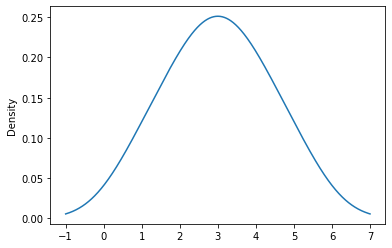

In [18]:
import matplotlib.pyplot as plt
s=pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() #kernel density estimate 곡선으로 출력
             # 데이터가 없는 부분은 kernel 로 예측 => 가우시안 분포
plt.show()

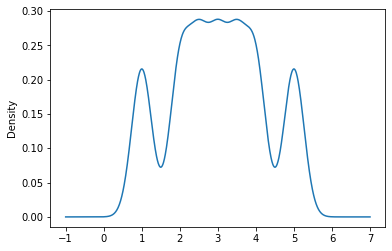

In [62]:
s.plot.kde(bw_method=0.2)
# 과적합 binwidth = 조금조금씩 예측하라 => 굴곡이 여러개 생기는게 맞음
plt.show()

# pandas = > dataFrame

In [50]:
import pandas as pd
# 행인덱스와 열인덱스 
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
# 2개의 열의 key 값이 공통이라서 => 자동으로 index 처리

data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


# 컬럼만 뽑아내서 호출하기

In [51]:
 # 열인덱스를 불러오면 그 열의 데이터를 다 가져옴
print(data.area) # DataFrame.컬럼명
data['area']     # DataFrame['컬럼명']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

# 객체비교

In [52]:
data.area is data['area']

True

# 객체에서 변수를 실시간 추가하는 것이 가능

# lsit => append

# 새로운 컬럼 = 연산을 통해서 추가가능

In [53]:
data['density'] = data['pop']/data['area']
data

# 결과값보면 density 컬럼에 value 산술연산에 의해 추가됨

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# values  데이터 값만 호출하고 싶을때

# DataFrame.values
## data.values[0] 첫번째행의 값만 출력

In [54]:
data.values         

# ndarray 로  = > numpy 함수로 처리 = 지수형태로 바뀜

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

# 행인덱스와 열인덱스 치환

In [55]:
data.T 

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [56]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [57]:
data.iloc[:3, :2] # 행과 열로 입력 호출

# 인덱스 호출하기 loc()=key 값으로 
#                 iloc()=숫자로 행호출

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [58]:
data.loc[:'Illinois', 'pop'] # [ :행 범위, 컬럼호출]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [40]:
# value  데이터값 치환!!

data.iloc[0,2] = 90      # 0행2열 위치의 데이터 치환하기
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [87]:
data['Florida':'Illinois'] # 행이름으로 : 범위호출

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [62]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나',
                       '오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

df=pd.DataFrame(d)
df

,Name,Age,Rating
0,김하나,25.0,4.23
1,이하나,26.0,3.24
2,삼하나,25.0,3.98
3,사하나,23.0,2.56
4,오하나,30.0,3.20
5,육하나,29.0,4.60
6,칠하나,23.0,3.80
7,팔하나,NaN,NaN


In [64]:
print(" 축", df.axes);print()  # 자동으로 행 = 첫번째 index 숫자로 자동처리 Index(start=0, stop=8, step=1)

print("데이터타입은 ", df.dtypes);print() # 3개의 열에 대한 데이터 타입 확인
print() # d.type 1차원/ 여긴 2차원이라서 dtypes

print("비었나", df.empty);print()
print("몇차원", df.ndim);print()
print("몇행 몇열", df.shape);print()


print("데이터 타입") # 중복 unique 처리
df.get_dtype_counts  # ? 그냥 데이터프레임 자료랑 똑같은거 같은데


 축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]

데이터타입은  Name       object
Age       float64
Rating    float64
dtype: object


비었나 False

몇차원 2

몇행 몇열 (8, 3)

데이터 타입


<bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>

In [108]:
print("사이즈", df.size);print()
print("값", df.values);print();print()

print( df.head(2));print()
print( df.tail(2))

사이즈 24

값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]


  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24

  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [70]:
#문자열인 데이터타입 => 오브젝트 ; 즉 문자열로만 되어있는 데이터를 뽑아내라
print('오브젝트', df.describe(include=['object']));print()


df.describe(include='all')


오브젝트        Name
count     8
unique    8
top     오하나
freq      1



,Name,Age,Rating
count,8,7.000000,7.000000
unique,8,NaN,NaN
top,오하나,NaN,NaN
freq,1,NaN,NaN
mean,NaN,25.857143,3.658571
std,NaN,2.734262,0.698628
min,NaN,23.000000,2.560000
25%,NaN,24.000000,3.220000
50%,NaN,25.000000,3.800000
75%,NaN,27.500000,4.105000


In [153]:
data={'state' :['경기','강원','서울','충북','인천'],
     'year':[2000,2001,2002,2001,2002],
     'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
frame2=pd.DataFrame(data, columns=['year', 'state','pop','debt'],
                    index=['one','two','three','four','five'])

frame2


,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [154]:
#1) state 만 출력하시요 => 특정열 호출
print(frame2.state)
frame2['state']


one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object

In [155]:
#2) debt 열을 추가하고( 이미 위에 DF 추가) 모든값을 16.5 로 입력하시오
frame2['debt']=16.5 # 하나만 적어주면 모든행에 들어간다
frame2

,year,state,pop,debt
one,2000,경기,1.5,16.5
two,2001,강원,1.7,16.5
three,2002,서울,3.6,16.5
four,2001,충북,2.4,16.5
five,2002,인천,2.9,16.5


In [156]:
#3) debt 를 pd.Series([-1.2, -1.5, -1.7], index=['two','four','five']) 로 수정하시오

wal=pd.Series([-1.2, -1.5, -1.7], index=['two','four','five'])
frame2['debt']=wal
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,-1.2
three,2002,서울,3.6,NaN
four,2001,충북,2.4,-1.5
five,2002,인천,2.9,-1.7


In [157]:
#4) 파생변수 'estern'에 주소가 서울인가를 따져서 서울은 True 아니면 False 로 입력되게 하시오
# 조건에 맞는 식을 만들어서 특정열에 끼워넣는 문제

In [164]:
frame2['estern']=frame2.state=='서울'
frame2

,year,state,pop,debt,estern
one,2000,경기,1.5,NaN,False
two,2001,강원,1.7,-1.2,False
three,2002,서울,3.6,NaN,True
four,2001,충북,2.4,-1.5,False
five,2002,인천,2.9,-1.7,False


In [165]:
# del 삭제
del frame2['estern']
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,-1.2
three,2002,서울,3.6,NaN
four,2001,충북,2.4,-1.5
five,2002,인천,2.9,-1.7


In [161]:
print(frame2['year']['one'])# 열이 먼저옴   => pandas 는 열중심
print(frame2.loc['one','year']) # loc 키데이터 인덱스

2000
2000


# 시간 함수

# linux : timestamp 1970.1.1 이후로 경과된 mili초로 표현

내부적으로 데이터저장시 timestamp 

## pandas 에서는 nano 초까지 표현, 시계열분석을 위해 시간인덱스 지원

DateTimeIndex, PeriodIndex 주기값

파이썬에서 사용하는 time 패키지 => time.time() : 2000.1.1 부터 경과된 mili초로 표현

# datatime : 날짜와 시간을 표현

In [72]:
import time
print(time.time());print() # 시간분초.밀리초 로 표현됨
print(time.localtime());print() #연,월,일,시,분,초

# 하루전날 시간연산으로 가능
yesterday = time.localtime(time.time() - 60*60*24)
yesterday

1578654537.1511347

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=10, tm_hour=20, tm_min=8, tm_sec=57, tm_wday=4, tm_yday=10, tm_isdst=0)



time.struct_time(tm_year=2020, tm_mon=1, tm_mday=9, tm_hour=20, tm_min=8, tm_sec=57, tm_wday=3, tm_yday=9, tm_isdst=0)

In [73]:
time.strftime('%Y %m %d')

'2020 01 10'

In [80]:
from datetime import date,time,datetime,timedelta # 델타는 시간차
now = datetime.now() # 년 월 일 시 분 초.밀리초
print(now)

print(now.year)
print(now.month)
print(now.day)

now.timestamp() # 시간을 다시 밀리초로 표현하고 싶을때

2020-01-10 20:09:57.466395
2020
1
10


1578654597.466395

In [84]:
now_str=now.strftime('%Y-%m-%d %H:%M:%S')
now_str


'2020-01-10 20:09:57'

In [88]:
datetime.strptime(now_str, '%Y-%m-%d %H:%M:%S')

<function datetime.strptime>

In [92]:
delta = datetime(2020, 1, 10) - datetime(1987, 6 ,17, 15 ,15)


print("시간차는=", delta, delta.days, delta.seconds) # 결과값보면 11901일 31500초 

시간차는= 11894 days, 8:45:00 11894 31500


In [93]:
start = datetime(2020,1,7)
print(start + timedelta(12)) # 기본이 날짜 : 12일을 더해라
start + timedelta(hours = -5)

2020-01-19 00:00:00


datetime.datetime(2020, 1, 6, 19, 0)

# pandas DatetimeIndex 

In [194]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255,unit='s')) # 타임스탬프에 밀리초단위로 적으면 자동변환

2020-01-07 17:07:42.679768
2017-03-01 00:00:00
2020-04-24 00:14:15


In [102]:
# DatetimeIndex 생성 : 행 index : 열키 ㅣ column
print(pd.date_range('1/1/2017', periods=5)) #  default 일간격 :  기본주기는 날짜

#                기준날짜 부터 periods 기간!


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')



In [203]:
print(pd.date_range('1/1/2017', periods=12, freq='M'))

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')


In [103]:
#freq 
print(pd.date_range("11:00", "13:30", freq="30min"));print() # 총 6개 생성
print(pd.date_range("11:00", "13:30", freq="H")) # 시간 단위로
#                   시작      끝

print(),print()

print("datetime.time(,) 으로 표기됨. 특이함")
pd.date_range("11:00", "13:30", freq="30min").time

DatetimeIndex(['2020-01-10 11:00:00', '2020-01-10 11:30:00',
               '2020-01-10 12:00:00', '2020-01-10 12:30:00',
               '2020-01-10 13:00:00', '2020-01-10 13:30:00'],
              dtype='datetime64[ns]', freq='30T')

DatetimeIndex(['2020-01-10 11:00:00', '2020-01-10 12:00:00',
               '2020-01-10 13:00:00'],
              dtype='datetime64[ns]', freq='H')


datetime.time(,) 으로 표기됨. 특이함


array([datetime.time(11, 0), datetime.time(11, 30), datetime.time(12, 0),
       datetime.time(12, 30), datetime.time(13, 0), datetime.time(13, 30)],
      dtype=object)

# pd.to_datetime()

In [95]:
print(pd.to_datetime(pd.Series(['Jul 31, 2019', '2010-01-10', None])))

# pd.Series 자료형으로 0,1,2 인덱스 생성시킴


# 리스트 형태로 출력 None => 결측치
pd.to_datetime(['2005/11/23', '2010.12.31', None])

0   2019-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]


DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)

# plot  함수 => index 시간으로 1000일간의 시계열분석 

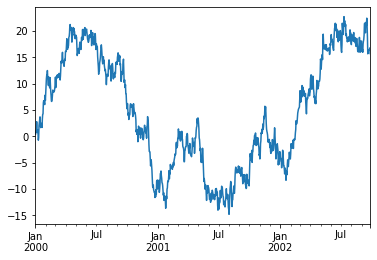

In [106]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum() #cumsum 은 누적합인데?
ts.plot()


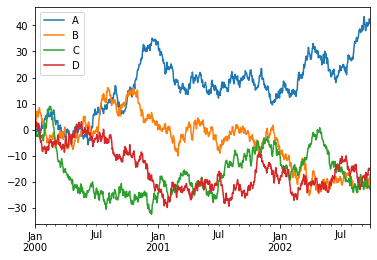

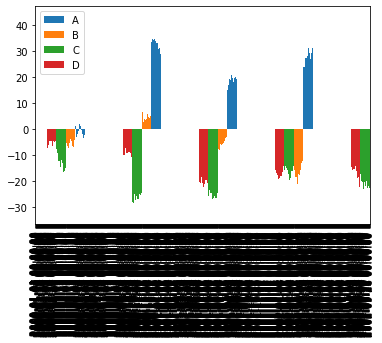

In [108]:
#                                           ts.시간인덱스 사용        # 4개의 데이터로 표현
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index,    columns=list('ABCD'))
df = df.cumsum()


df.plot()
df.plot.bar()

In [216]:
문제# 다음 데이터를 데이터프레임에 저장하시요

         지역  2018     2017      2016       2015     2015-2018 증가율
 서울 수도권  9904312   9631482   9762546   9853972    0.0283
 부산 경상권  3448737   3393191   3512547   3655437    0.0163
 인천 수도권  2890451   2632035   2517680   2466338    0.0982
 대구 경상권  2466052   2431774   2456016   2473990    0.0141
    
column = ['지역', '2018', '2017', '2016', '2015', '2018-2018 증가율']
index=['서울','부산','인천''대구']

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [265]:
d = {'지역':[ '수도권', '경상권', '수도권', '경상권'],
    '2018':[ 9904312,  3448737,2890451,  2466052],
   '2017': [ 9631482, 3393191,2632035, 2431774 ],
    '2016': [ 9762546, 3512547, 2517680, 2456016 ],
    '2015': [ 9853972, 3655437, 2466338, 2473990 ],
    '2015-2018 증가율': [ 0.0283, 0.0163, 0.0982, 0.0141]}


df=pd.DataFrame(d , columns=['지역', '2018', '2017', '2016', '2015', '2015-2018 증가율'],
               index= ['서울', '부산', '인천' , '부산' ])


df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
부산,경상권,2466052,2431774,2456016,2473990,0.0141


In [266]:
# 문제 : '2015-2018 증가율'을 % 로 변경하시요
# 문제 : 2015-2017의 증가율을 구해서 변수를 추가하시오
#( 열이름 '2015-2018 증가율')

In [267]:
df['2015-2018 증가율'] = df['2015-2018 증가율'] * 100
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
부산,경상권,2466052,2431774,2456016,2473990,1.41


In [268]:
df['2015-2017 증가율']= (df['2017'] -df['2015'])/df['2015']
df

,지역,2018,2017,2016,2015,2015-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-0.022579
부산,경상권,3448737,3393191,3512547,3655437,1.63,-0.071741
인천,수도권,2890451,2632035,2517680,2466338,9.82,0.067183
부산,경상권,2466052,2431774,2456016,2473990,1.41,-0.017064
